In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/classroom_actions.csv" )

In [3]:
df.head(10)

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
8,2015-08-10 21:03:33.719529,929620,experiment,90,False
9,2015-08-10 22:47:00.254898,512761,experiment,59,False


(array([  9.,  47., 217., 485., 789., 815., 710., 514., 200.,  43.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. ]),
 <BarContainer object of 10 artists>)

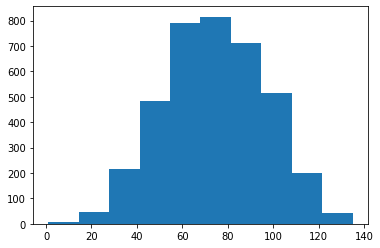

In [5]:
plt.hist(df.total_days)

In [6]:
obs_diff = df [df.group == 'experiment'].total_days.mean() - df [df.group == 'control'].total_days.mean()
obs_diff

1.3026031488719099

(array([2.100e+01, 1.290e+02, 6.820e+02, 1.987e+03, 3.015e+03, 2.542e+03,
        1.253e+03, 3.320e+02, 3.600e+01, 3.000e+00]),
 array([-1.41202705, -0.83803545, -0.26404386,  0.30994774,  0.88393933,
         1.45793093,  2.03192252,  2.60591412,  3.17990571,  3.75389731,
         4.3278889 ]),
 <BarContainer object of 10 artists>)

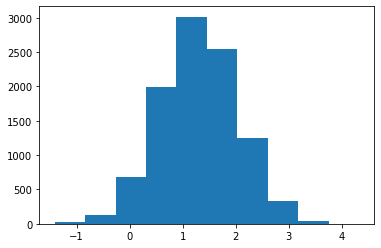

In [7]:
diff = []
for _ in range (10000):
    sample = df.sample(df.shape[0], replace = True)
    diff.append(sample [sample.group == 'experiment'].total_days.mean() - sample [sample.group == 'control'].total_days.mean()) 
plt.hist (diff)

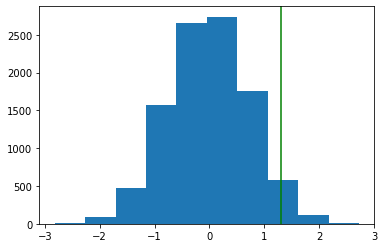

In [8]:
diff = np.array(diff)
null = np.random.normal(0, diff.std(), diff.size)
plt.hist (null)
plt.axvline (x= obs_diff ,  c = 'green')

In [9]:
(null> obs_diff).mean () *100 

3.5999999999999996